A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new ma

Apply any 5 algorithms to the regression problem provided.
For example:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor
Rootmap:
1. Understand problem statement
2. Import necessary libraries and data
3.  Check the data
Info()
Describe((
Isnull()
Duplicated()
Df. Columns
Length of unique values in each column.
4. Data preprocessing
Drop car id
Find unique values in categorical or count plot
extract company name from car name and address this new col to df also remove car name column.
There are spelling mistakes in company name. Treat this.
Label encoding all the categorical columns
Outliers detection and removal( if present)
5. Feature selection
Find correlation matrix
Remove multicolinearity (remove features with High correlation .85 to 1)
6. Data splitting
Test, train
7. Model selection and implementation
8. Model evaluation
rket.


In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [138]:
car = pd.read_csv("C:\\Users\\naasa\\OneDrive\\Desktop\\Entri\\machine learning\\Machine learning Task\\CarPrice_Assignment.csv")
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [139]:
print(car.info())
print(car.describe())
print(car.isnull().sum())
print(car.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [140]:
#unique values and their length for each column
for column in car.columns:
    unique_value = car[column].unique()
    print(f"----\nColumn: {column}, \nUnique values {unique_value}, length = {len(unique_value)}")

----
Column: car_ID, 
Unique values [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205], length = 205
----
Column: symboling, 
Unique values [ 3  1  2  0 -1 -2], length = 6
----
Column: CarName, 
Unique values ['alfa-ro

### Preprocessing

In [141]:
car.drop(columns=["car_ID"], inplace= True)

In [142]:
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [143]:
car['Brand'] = car['CarName'].str.split(' ').str[0]
car.drop(columns=["CarName"],inplace=True)
car

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [144]:
car["Brand"].value_counts()

Brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [145]:
brand_names={
    'maxda':'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

car["Brand"]=car["Brand"].replace(brand_names)
# convert company name to lower case for consistency
car["Brand"]=car["Brand"].str.lower()
# Display unique company names after treatment
print("Unique Brand names after treatment:")
print(car['Brand'].unique())


Unique Brand names after treatment:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [146]:
#Label encoding
categorical_cols = car.select_dtypes(include=["object"]).columns
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Brand'],
      dtype='object')

In [147]:
for col in categorical_cols:
    car[col] = LabelEncoder().fit_transform(car[col])

# Display the encoded DataFrame
print(car.head())

   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0               0       88.6      168.8      64.1  ...           5       3.47   
1               0       88.6      168.8      64.1  ...           5       3.47   
2               0       94.5      171.2      65.5  ...           5       2.68   
3               0       99.8      176.6      66.2  ...           5       3.19   
4               0       99.4      176.6      66.4  ...           5       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68    

In [148]:
# Outliers detection and removal( if present)
numeric_cols=car.select_dtypes(include=["int","float"]).columns
for col in numeric_cols:
    q1=car[col].quantile(0.25)
    q3=car[col].quantile(0.75)
    IQR=q3-q1

    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    outlier_car=car[(car[col]>=lower_bound)&(car[col]<=upper_bound)]
    car_cleaned_IQR = car[~car[col].isin(outlier_car[col])]
len(car_cleaned_IQR)

0

DataFrame after outlier removal:
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0                 

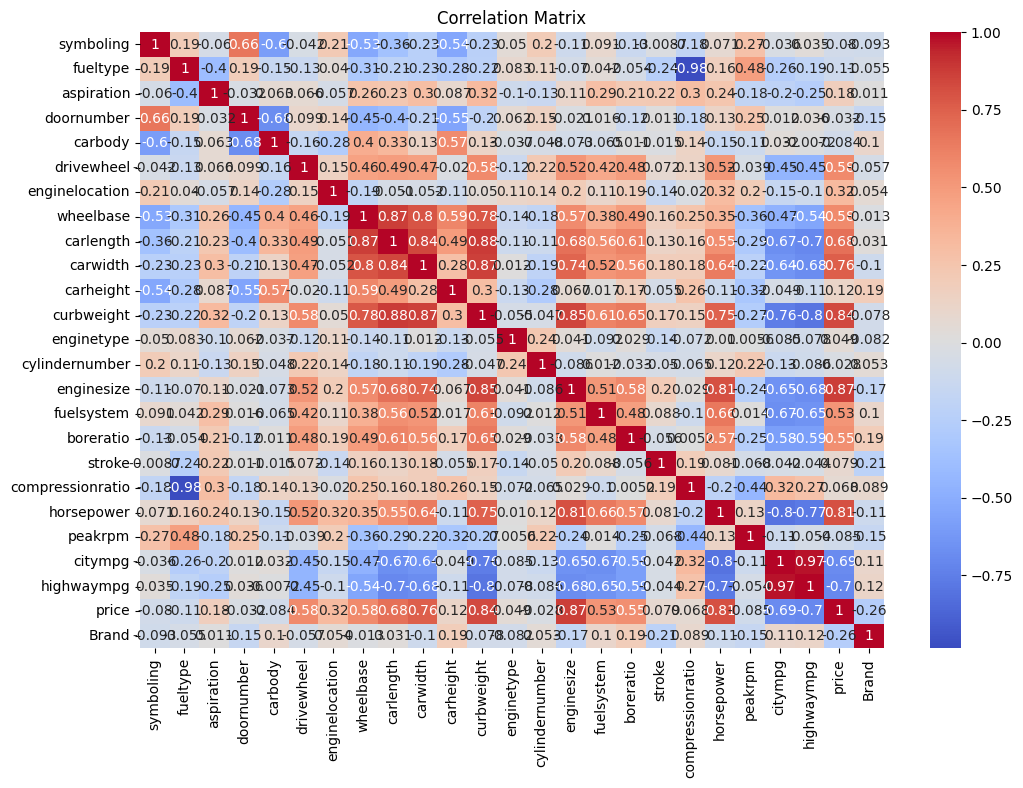

In [149]:
# Display the DataFrame after outlier removal
print("DataFrame after outlier removal:")
print(car)
# Find correlation matrix
corr_matrix=car.corr()
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [155]:
# Remove multicolinearity (remove features with High correlation .85 to 1)
# Calculate the correlation matrix
correlation_matrix = car.corr().abs()

# Create a mask to identify highly correlated features
mask = (correlation_matrix > 0.85) & (correlation_matrix < 1.0)

# Drop the columns with high correlation
drop_columns = set()
for col in correlation_matrix.columns:
    correlated_features = correlation_matrix.index[mask[col]]
    drop_columns.update(correlated_features)

df_filtered = car.drop(columns=drop_columns)

# Display the DataFrame after removing highly correlated features
print("DataFrame after removing highly correlated features:")
print(df_filtered.head())

DataFrame after removing highly correlated features:
   symboling  aspiration  doornumber  carbody  drivewheel  enginelocation  \
0          3           0           1        0           2               0   
1          3           0           1        0           2               0   
2          1           0           1        2           2               0   
3          2           0           0        3           1               0   
4          2           0           0        3           0               0   

   carheight  enginetype  cylindernumber  fuelsystem  boreratio  stroke  \
0       48.8           0               2           5       3.47    2.68   
1       48.8           0               2           5       3.47    2.68   
2       52.4           5               3           5       2.68    3.47   
3       54.3           3               2           5       3.19    3.40   
4       54.3           3               1           5       3.19    3.40   

   horsepower  peakrpm  Brand  
0

Data Splitting

In [156]:
x=car.drop('price',axis=1)
y=car['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [164]:
model= {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression':RandomForestRegressor(),
    'Decision Tree Regression':DecisionTreeRegressor(),
    'Gradient Boosting Regression':GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print()


Linear Regression:
Mean Squared Error: 12163932.547872731
R-squared: 0.8459169876029569

Random Forest Regression:
Mean Squared Error: 3421840.1296182615
R-squared: 0.9566548537623322

Decision Tree Regression:
Mean Squared Error: 8138976.924485098
R-squared: 0.8969019207054052

Gradient Boosting Regression:
Mean Squared Error: 5448390.047793694
R-squared: 0.9309841329706372

Support Vector Regressor:
Mean Squared Error: 86992752.81571177
R-squared: -0.10195492763566705

